<a href="https://colab.research.google.com/github/TimDommett/Machine-Learning-Notebooks/blob/master/Recurrent_Neural_Networks_Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Networks



In [1]:
!git clone https://github.com/Dataweekends/zero_to_deep_learning_udemy.git


Cloning into 'zero_to_deep_learning_udemy'...
remote: Enumerating objects: 364, done.
remote: Total 364 (delta 0), reused 0 (delta 0), pack-reused 364
Receiving objects: 100% (364/364), 6.53 MiB | 10.97 MiB/s, done.
Resolving deltas: 100% (227/227), done.


In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Time series forecasting

In [3]:
from pandas.tseries.offsets import MonthEnd

df = pd.read_csv('zero_to_deep_learning_udemy/data/cansim-0800020-eng-6674700030567901031.csv',
                 skiprows=6, skipfooter=9,
                 engine='python')

df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


In [0]:
split_date = pd.Timestamp('01-01-2011')

In [0]:
train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

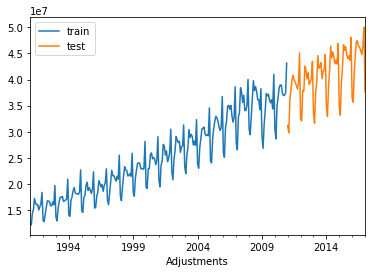

In [7]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [0]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [0]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)

for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [10]:
X_train.shape

(228, 12)

In [0]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

In [12]:
X_train_t.shape

(228, 12, 1)

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

In [15]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(12, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6)                 192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [0]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [20]:
model.fit(X_train_t, y_train, epochs=100,
          batch_size=1, verbose=1)

Epoch 1/100
228/228 [==============================] - 1s 6ms/step - loss: 0.0072
Epoch 2/100
228/228 [==============================] - 1s 6ms/step - loss: 0.0070
Epoch 3/100
228/228 [==============================] - 1s 6ms/step - loss: 0.0066
Epoch 4/100
228/228 [==============================] - 1s 6ms/step - loss: 0.0065
Epoch 5/100
228/228 [==============================] - 1s 6ms/step - loss: 0.0065
Epoch 6/100
228/228 [==============================] - 1s 6ms/step - loss: 0.0066
Epoch 7/100
228/228 [==============================] - 1s 6ms/step - loss: 0.0063
Epoch 8/100
228/228 [==============================] - 1s 6ms/step - loss: 0.0059
Epoch 9/100
228/228 [==============================] - 1s 6ms/step - loss: 0.0057
Epoch 10/100
228/228 [==============================] - 1s 6ms/step - loss: 0.0059
Epoch 11/100
228/228 [==============================] - 1s 6ms/step - loss: 0.0055
Epoch 12/100
228/228 [==============================] - 2s 7ms/step - loss: 0.0052
Epoch 13/100


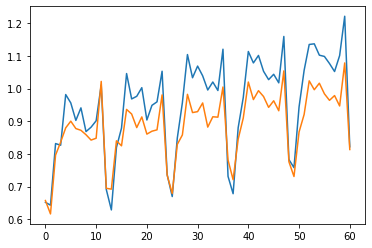

In [21]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)